<a href="https://colab.research.google.com/github/selfmaded/python_study/blob/master/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **앙상블 기법 활용** 

# **랜덤포레스트 손글씨 분류**

**라이브러리 import**

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**데이터셋 로드 및 확인**

In [ ]:
mnist = fetch_openml('mnist_784') # mnist_784 데이터셋 로드

In [ ]:
mnist_data = mnist.data[:10000] # mnist.data에서 10000개의 데이터만 mnist_data에 대입후 선언
mnist_target = mnist.target[:10000] # mnist.target에서 10000개의 데이터만 mnist_data에 대입후 선언

print(mnist_data) # mnist_data 출력
print(mnist_data.shape) # mnist_data 데이터 shape 출력
print(mnist_target) # mnist_target 출력
print(mnist_target.shape) # mnist_target 데이터 shape 출력

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 784)
['5' '0' '4' ... '6' '9' '7']
(10000,)


**학습/테스트 데이터 나누기**

In [ ]:
# 20%를 테스트 데이터로 분류합니다
X_train,X_test,y_train,y_test=train_test_split(mnist_data,
                                               mnist_target,test_size=0.2) # train_test_split을 사용하여 mnist_data와 mnist_target를 8:2로 나누어 학습 데이터, 테스트 데이터 생성

**파라미터 없이 학습하기**

In [ ]:
# module loading
dt_clf = tree.DecisionTreeClassifier() # decision tree classifier 선언
rf_clf = RandomForestClassifier() # random forest classifier 선언

# train data!
dt_clf.fit(X_train, y_train) # dt_clf 모델을 X_train, y_train 데이터로 학습
rf_clf.fit(X_train, y_train) # rf_clf 모델을 X_train, y_train 데이터로 학습

# 예측
dt_pred = dt_clf.predict(X_test) # df_clf 모델을 통해 X_test의 결과를 예측
rf_pred = rf_clf.predict(X_test) # rf_clf 모델을 통해 X_test의 결과를 예측

accuracy_dt = accuracy_score(y_test, dt_pred) # y_test와 dt_pred를 통해 정확도 측정
accuracy_rf = accuracy_score(y_test, rf_pred) # y_test와 rf_pred를 통해 정확도 측정

In [ ]:
print('의사결정트리 예측 정확도: {0:.4f}'.format(accuracy_dt)) # accuracy_dt 출력
print('랜덤 포레스트 예측 정확도: {0:.4f}'.format(accuracy_rf)) # accuracy_rf 출력

의사결정트리 예측 정확도: 0.8115
랜덤 포레스트 예측 정확도: 0.9485


**모델 파라미터 확인**

In [ ]:
print(rf_clf) # rf_clf의 모델 파라미터 확인

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**특징 중요도 확인**

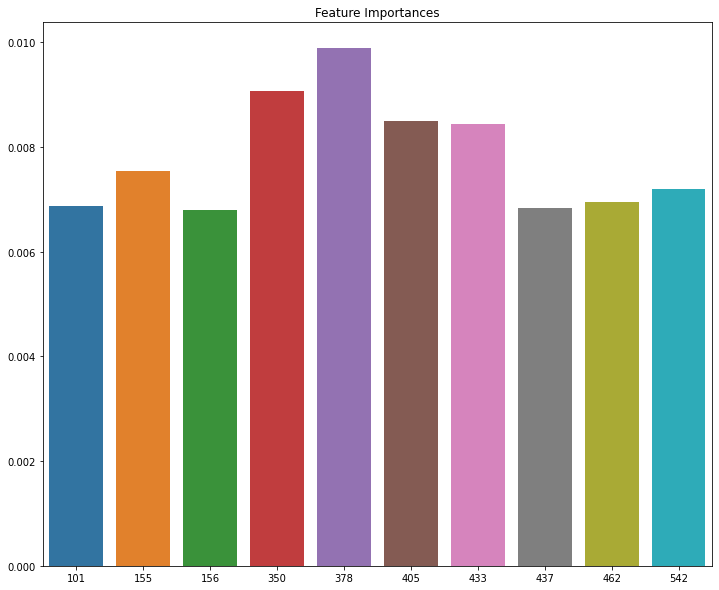

In [ ]:
ft_importances_values = rf_clf.feature_importances_ # rf_clf의 feature importance를 ft_importances_value에 대입하여 선언
ft_importances = pd.Series(ft_importances_values) # ft_importances_values를 pandas series 형식으로 바꾼 후 ft_importances에 대입하여 선언
top10 = ft_importances.sort_values(ascending=False)[:10] # ft_importance값을 높은 값으로 sorting한 후 높은 순으로 10개만 top10에 대입하여 선언
plt.figure(figsize=(12,10)) # figure size 설정
plt.title('Feature Importances') # figure title 설정
sns.barplot(x=top10.index, y=top10) # top10의 index값과 value값으로 bar plot 그래프 생성
plt.show() # 그래프 출력

**파라미터를 사용하여 학습하기**

In [ ]:
rf_param_grid ={ # rf_param_grid dictionary 선언
    'n_estimators' : [100, 110, 120],
    'min_samples_leaf' : [1, 2, 3],
    'min_samples_split' : [2, 3, 4]
    }
rf_clf = RandomForestClassifier(random_state = 0) # random state를 0으로 고정한 random forest classifier 선언
grid = GridSearchCV(rf_clf, param_grid = rf_param_grid, scoring='accuracy', n_jobs=1) # gridsearchcv 선언, model: rf_clf, param_grid: grid search parameter(rf_param_grid), scoring: grid search 기준을 'accuracy'로 설정, n_jobs: 병렬처리 설정

grid.fit(X_train, y_train) # X_train_, y_train 데이터로 grid 학습

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [ ]:
print('최고 평균 정확도 : {0:.4f}'.format(grid.best_score_)) # grid의 best scroe를 출력
print(grid.best_params_)  # grid의 best parameter 출력

최고 평균 정확도 : 0.9440
{'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 110}


# **앙상블 기법 활용2**

# 보팅 앙상블 손글씨 분류

**라이브러리 import**

In [ ]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

**손글씨 데이터 로드**

In [ ]:
np.random.seed(5) # sklearn 모델의 동일한 결과 출력을 위해 선언 (random seed 설정)
mnist = datasets.load_digits() # mnist 데이터 로드
features, labels = mnist.data, mnist.target # mnist data와 target을 features와 labels에 각각 대입하여 선언
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2) #  features, labels를 8:2비율의 train, test set으로 나누어 분류

**단일 모델 정확도 측정**

In [ ]:
dtree = tree.DecisionTreeClassifier( # decision tree classifier 선언, criterion: split할 특성 선택 알고리즘, ('gini': 지니 계수, 'entropy': 엔트로피), max_depth: tree의 depth 설정, max_features: 하위 노드로 분리할 때 랜덤으로 선택되는 feature의 개수
    criterion="gini", max_depth=8, max_features=32)

dtree = dtree.fit(X_train, y_train) # X_train, y_train을 사용하여 dtree 학습
dtree_predicted = dtree.predict(X_test) # dtree를 사용하여 X_test 결과 예측

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train) # neighbors를 299로 설정한 Knn을 선언하여 X_train, y_train으로 학습
knn_predicted = knn.predict(X_test) # knn을 사용하여 X_test 결과 예측

svm = SVC(C=0.1, gamma=0.003, # Support Vector Classifier 선언 후 X_train_ y_train으로 학습
          probability=True).fit(X_train, y_train) # C: 규제 정도, gamma: 커널폭의 역수, probability: 확률 추정의 사용 여부 설정
svm_predicted = svm.predict(X_test) # svm을 사용하여 X_test의 결과 예측

In [ ]:
print("[accuarcy]")
print("d-tree: ", accuracy_score(y_test, dtree_predicted)) # y_test와 dtree_predicted를 사용하여 정확도를 측정하고 결과 출력
print("knn   : ", accuracy_score(y_test, knn_predicted)) # y_test와 knn_predicted를 사용하여 정확도를 측정하고 결과 출력
print("svm   : ", accuracy_score(y_test, svm_predicted)) # y_test와 svm_predicted를 사용하여 정확도를 측정하고 결과 출력

[accuarcy]
d-tree:  0.7916666666666666
knn   :  0.8944444444444445
svm   :  0.8916666666666667


**분류값별 확률 확인**

In [ ]:
svm_proba = svm.predict_proba(X_test) # svm을 사용하여 X_test의 결과를 확률로 예측
print(svm_proba[0:2]) # svm_proba 상위 2개에 대한 확률 값을 출력

[[0.0024204  0.00606615 0.00987758 0.00448485 0.00718829 0.87457395
  0.00271474 0.00980553 0.06667548 0.01619302]
 [0.00320224 0.00769816 0.85262968 0.0075194  0.0068834  0.01555122
  0.00370144 0.00983945 0.0769742  0.01600082]]


**하드 보팅**

In [ ]:
voting_model = VotingClassifier(estimators=[ # voting classifier 선언, estimator로는 decision tree, knn, svm을 사용, 가중치는 1,1,1로 동일하게 설정, voting: hard, soft 설정
    ('Decision_Tree', dtree), ('k-NN', knn), ('SVM', svm)], 
    weights=[1,1,1], voting='hard')
voting_model.fit(X_train, y_train) # X_train, y_train 데이터로 voting_model 학습
hard_voting_predicted = voting_model.predict(X_test) # voting_model을 통해 X_test 결과 예측
accuracy_score(y_test, hard_voting_predicted) # y_test, hard_voting_predicted로 정확도를 계산하여 반환

0.9472222222222222

**소프트 보팅**

In [ ]:
voting_model = VotingClassifier(estimators=[ # # voting classifier 선언, estimator로는 decision tree, knn, svm을 사용, 가중치는 1,1,1로 동일하게 설정, voting: hard, soft 설정
    ('Decision_Tree', dtree), ('k-NN', knn), ('SVM', svm)], 
    weights=[1,1,1], voting='soft')
voting_model.fit(X_train, y_train) # X_train, y_train 데이터로 voting_model 학습
soft_voting_predicted = voting_model.predict(X_test) # voting_model을 통해 X_test 결과 예측
accuracy_score(y_test, soft_voting_predicted) # y_test, soft_voting_predicted로 정확도를 계산하여 반환

0.9222222222222223

**정확도 비교 시각화**

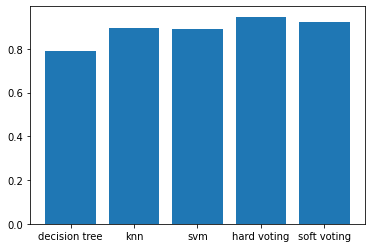

In [ ]:
x = np.arange(5) # [0, 1, 2, 3, 4] 배열을 x에 대입하여 선언
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted), # 'decision tree','knn','svm','hard voting','soft voting' 정확도를 측정하여 바 그래프로 생성
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']); # x축 레이블 설정